In [10]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import emoji

# Random Forest
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Support Vector Machine (SVM)
from sklearn.svm import SVC

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


from cleantext import clean
import plotly.express as px

## Reading cleaned data + dataset

In [11]:
df = pd.read_csv('hello_talk_cleaned_data.csv')

In [12]:
tokenized_list = pd.read_csv('hello_talk_tokenized.csv')

/var/folders/pr/9bm58yl12_jgb_1gj55t5cjw0000gn/T/ipykernel_13754/2923841302.py:1: DtypeWarning: Columns (63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178) have mixed types. Specify dtype option on import or set low_memory=False.
  tokenized_list = pd.read_csv('hello_talk_tokenized.csv')


In [13]:
tokenized_list = [list(row.dropna()) for _, row in tokenized_list.iterrows()]

for i in range(5):
    print(tokenized_list[i])

[0, 'feel', 'like', 'program', 'old', 'friend']
[1, 'interesting', 'good', 'find', 'good', 'friend']
[2, 'use', 'nice', 'useful', 'hide', 'ability', 'find', 'people', 'live', 'city', 'behind', 'paywall', 'make', 'conpletely', 'useless', 'highly', 'disapointe', 'delete']
[3, 'personal', 'opinion', 'change']
[4, 'amazing', 'give', 'many', 'chance', 'practice', 'language', 'want', 'learn', 'aslo', 'givs', 'chance', 'make', 'new', 'friend', 'really', 'deserve', 'star']


In [14]:
tokenized_list

[[0, 'feel', 'like', 'program', 'old', 'friend'],
 [1, 'interesting', 'good', 'find', 'good', 'friend'],
 [2,
  'use',
  'nice',
  'useful',
  'hide',
  'ability',
  'find',
  'people',
  'live',
  'city',
  'behind',
  'paywall',
  'make',
  'conpletely',
  'useless',
  'highly',
  'disapointe',
  'delete'],
 [3, 'personal', 'opinion', 'change'],
 [4,
  'amazing',
  'give',
  'many',
  'chance',
  'practice',
  'language',
  'want',
  'learn',
  'aslo',
  'givs',
  'chance',
  'make',
  'new',
  'friend',
  'really',
  'deserve',
  'star'],
 [5,
  'ban',
  'account',
  'reason',
  'download',
  'give',
  'bad',
  'review',
  'ban',
  'account',
  'reason',
  'plz',
  'stop',
  'install',
  'anymore'],
 [6, 'good', 'language', 'learning'],
 [7, 'beneficial', 'learn', 'something', 'everything', 'amazing'],
 [8,
  'use',
  'use',
  'many',
  'year',
  'ago',
  'learn',
  'japanese',
  'download',
  'learn',
  'vietnamese',
  'seem',
  'change',
  'language',
  'unless',
  'pay',
  'vip']

In [15]:
empty_lists_count = sum(1 for lst in tokenized_list if not lst)
print(f"Number of empty lists: {empty_lists_count}")


Number of empty lists: 0


In [16]:
df.head()

Unnamed: 0.1  Unnamed: 0        userName  \
0             0           0        Otis Tye   
1             1           1      Dami Vicky   
2             2           2  Micky Bélanger   
3             3           3    Sophia Ahmad   
4             4           4  Yousef El d7i7   

                                             content  score  thumbsUpCount  \
0         I feel like this program is an old friend.      4              0   
1  very interesting and good app , find a Good fr...      5              0   
2  It used to be very nice and useful, but now th...      1              0   
3                  My personal opinion has changed 😍      5              0   
4  Amazing app that will give many chances to to ...      5              0   

  reviewCreatedVersion                   at  \
0                  NaN  2023-11-06 08:17:27   
1               5.4.41  2023-11-06 06:23:46   
2               5.4.41  2023-11-06 05:32:07   
3               5.4.41  2023-11-06 00:36:19   
4               5.4.41  2023-11-05 22:33:52   

                                     content_cleaned  
0                       feel like program old friend  
1                  interesting good find good friend  
2  used nice useful hid ability find people livin...  
3                           personal opinion changed  
4  amazing give many chances practice language u ...

In [17]:
# list values into dataframe
df_tokenized = pd.DataFrame()
for sublist in tokenized_list:
    index_value = sublist[0]
    combined_text = ' '.join(map(str, sublist[1:]))
    df_tokenized = pd.concat([df_tokenized, pd.DataFrame({'Index': [index_value], 'content_lemmatized': [combined_text]})], ignore_index=True)

In [18]:
df.shape

(26649, 9)

In [19]:
df_tokenized.shape

(26649, 2)

In [20]:
df.rename(columns={'Unnamed: 0.1': 'Index'}, inplace=True)

#Merged dataset w/ cleaned and lemmatized data 

df = pd.merge(df, df_tokenized, on='Index')
df.head()

Index  Unnamed: 0        userName  \
0      0           0        Otis Tye   
1      1           1      Dami Vicky   
2      2           2  Micky Bélanger   
3      3           3    Sophia Ahmad   
4      4           4  Yousef El d7i7   

                                             content  score  thumbsUpCount  \
0         I feel like this program is an old friend.      4              0   
1  very interesting and good app , find a Good fr...      5              0   
2  It used to be very nice and useful, but now th...      1              0   
3                  My personal opinion has changed 😍      5              0   
4  Amazing app that will give many chances to to ...      5              0   

  reviewCreatedVersion                   at  \
0                  NaN  2023-11-06 08:17:27   
1               5.4.41  2023-11-06 06:23:46   
2               5.4.41  2023-11-06 05:32:07   
3               5.4.41  2023-11-06 00:36:19   
4               5.4.41  2023-11-05 22:33:52   

                                     content_cleaned  \
0                       feel like program old friend   
1                  interesting good find good friend   
2  used nice useful hid ability find people livin...   
3                           personal opinion changed   
4  amazing give many chances practice language u ...   

                                  content_lemmatized  
0                       feel like program old friend  
1                  interesting good find good friend  
2  use nice useful hide ability find people live ...  
3                            personal opinion change  
4  amazing give many chance practice language wan...

In [22]:
# Label encoding and labeling the reviews as "negative" and "positive" by scores

def label_encode(x):
    if x == 1 or x == 2:
        return 0
    if x == 5 or x == 4:
        return 1
    

def label2name(x):
    if x == 0:
        return "negative"
    if x == 1:
        return "positive"

In [23]:
df["label"] = df["score"].apply(lambda x: label_encode(x))
df["sentiment"] = df["label"].apply(lambda x: label2name(x))

In [24]:
df['sentiment'].value_counts()

sentiment
positive    19830
negative     6819
Name: count, dtype: int64

In [25]:
df.head()

Index  Unnamed: 0        userName  \
0      0           0        Otis Tye   
1      1           1      Dami Vicky   
2      2           2  Micky Bélanger   
3      3           3    Sophia Ahmad   
4      4           4  Yousef El d7i7   

                                             content  score  thumbsUpCount  \
0         I feel like this program is an old friend.      4              0   
1  very interesting and good app , find a Good fr...      5              0   
2  It used to be very nice and useful, but now th...      1              0   
3                  My personal opinion has changed 😍      5              0   
4  Amazing app that will give many chances to to ...      5              0   

  reviewCreatedVersion                   at  \
0                  NaN  2023-11-06 08:17:27   
1               5.4.41  2023-11-06 06:23:46   
2               5.4.41  2023-11-06 05:32:07   
3               5.4.41  2023-11-06 00:36:19   
4               5.4.41  2023-11-05 22:33:52   

                                     content_cleaned  \
0                       feel like program old friend   
1                  interesting good find good friend   
2  used nice useful hid ability find people livin...   
3                           personal opinion changed   
4  amazing give many chances practice language u ...   

                                  content_lemmatized  label sentiment  
0                       feel like program old friend      1  positive  
1                  interesting good find good friend      1  positive  
2  use nice useful hide ability find people live ...      0  negative  
3                            personal opinion change      1  positive  
4  amazing give many chance practice language wan...      1  positive

In [26]:
# Distribution of positive and negative reviews

figure = px.histogram(df, x='sentiment', color='sentiment', title='Distribution of Sentiments', width=800, height=700)
figure.show()

## Reading topic weights data

In [27]:
df_topic_weights = pd.read_csv("hellotalk_topic_weights.csv")

In [28]:
len(df_topic_weights)

26649

In [29]:
df_topic_weights.head()

Unnamed: 0   Topic_0   Topic_1   Topic_2   Topic_3   Topic_4 Dominant_Topic
0           0  0.599931  0.100015  0.100027  0.100014  0.100013              0
1           1  0.041472  0.041427  0.041052  0.522501  0.353549              3
2           2  0.264858  0.071996  0.068465  0.070816  0.523864              4
3           3  0.183309  0.510703  0.054846  0.056561  0.194581              1
4           4  0.048688  0.052113  0.048934  0.799723  0.050542              3

In [30]:
df_topic_weights['Dominant_Topic'].value_counts()

Dominant_Topic
4                  9432
1                  7316
3                  6372
0                  2110
2                  1415
multiple topics       4
Name: count, dtype: int64

In [31]:
df_topic_weights = df_topic_weights[['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4']]


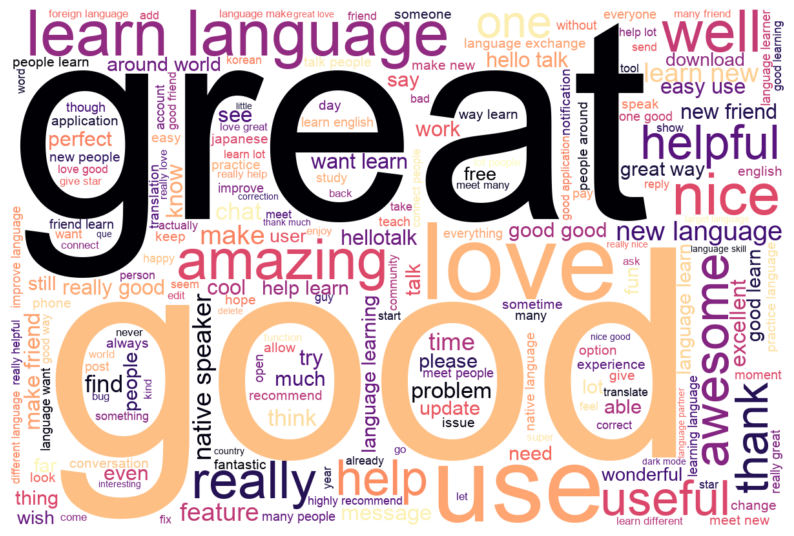

In [32]:
# WordCloud of positive reviews 

positive_reviews = df[df['sentiment'] == 'positive']['content_lemmatized'].tolist()
positive_reviews_string = " ".join(positive_reviews)

wordcloud = WordCloud(width=1200, height=800, background_color='white', colormap='magma', font_path='Arial').generate(positive_reviews_string)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

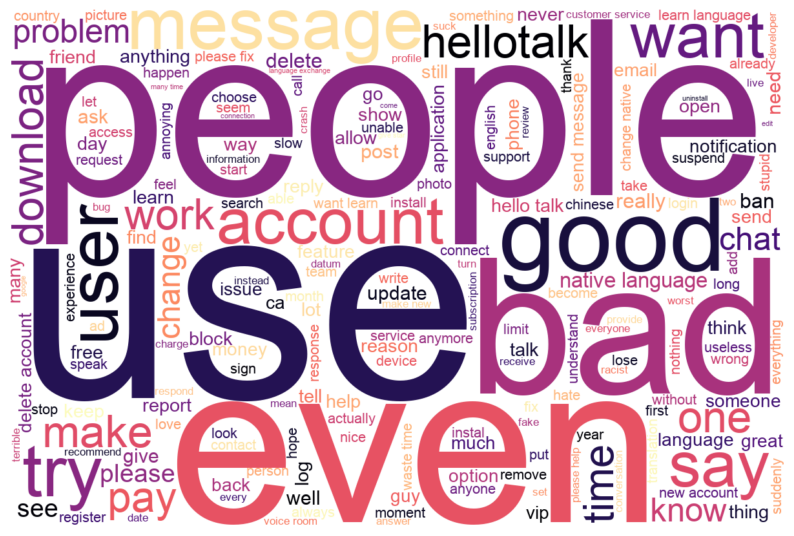

In [33]:
# WordCloud of negative reviews 

negative_reviews = df[df['sentiment'] == 'negative']['content_lemmatized'].tolist()
negative_reviews_string = " ".join(negative_reviews)

wordcloud = WordCloud(width=1200, height=800, background_color='white', colormap='magma', font_path='Arial').generate(negative_reviews_string)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

# Model 1
##  (Topic Weights & Sentiment Label)

* Model 1 refers to the model that includes sentiment labels and TF-IDF vectorization on topic weights. 

In [34]:
# Label encoding for "sentiment"

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])

In [35]:
from scipy.sparse import csr_matrix
topic_weights_sparse = csr_matrix(df_topic_weights.values)

In [36]:
topic_weights_sparse.shape

(26649, 5)

In [38]:
df.head()

Index  Unnamed: 0        userName  \
0      0           0        Otis Tye   
1      1           1      Dami Vicky   
2      2           2  Micky Bélanger   
3      3           3    Sophia Ahmad   
4      4           4  Yousef El d7i7   

                                             content  score  thumbsUpCount  \
0         I feel like this program is an old friend.      4              0   
1  very interesting and good app , find a Good fr...      5              0   
2  It used to be very nice and useful, but now th...      1              0   
3                  My personal opinion has changed 😍      5              0   
4  Amazing app that will give many chances to to ...      5              0   

  reviewCreatedVersion                   at  \
0                  NaN  2023-11-06 08:17:27   
1               5.4.41  2023-11-06 06:23:46   
2               5.4.41  2023-11-06 05:32:07   
3               5.4.41  2023-11-06 00:36:19   
4               5.4.41  2023-11-05 22:33:52   

                                     content_cleaned  \
0                       feel like program old friend   
1                  interesting good find good friend   
2  used nice useful hid ability find people livin...   
3                           personal opinion changed   
4  amazing give many chances practice language u ...   

                                  content_lemmatized  label sentiment  
0                       feel like program old friend      1  positive  
1                  interesting good find good friend      1  positive  
2  use nice useful hide ability find people live ...      0  negative  
3                            personal opinion change      1  positive  
4  amazing give many chance practice language wan...      1  positive

In [39]:
'''# Performance computing function

def compute_performance(name, model, X_test, y_test):
    # Importing all the metrics
    from sklearn.metrics import (
        confusion_matrix,
        accuracy_score,
        precision_score,
        recall_score,
        f1_score
    )

    # Predict
    model = model.fit(X_train, y_train)
    pred = model.predict(X_test) 

    # Calculate measures
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1score = f1_score(y_test, pred)
    return [name, accuracy, precision, recall, f1score] '''

'# Performance computing function\n\ndef compute_performance(name, model, X_test, y_test):\n    # Importing all the metrics\n    from sklearn.metrics import (\n        confusion_matrix,\n        accuracy_score,\n        precision_score,\n        recall_score,\n        f1_score\n    )\n\n    # Predict\n    model = model.fit(X_train, y_train)\n    pred = model.predict(X_test) \n\n    # Calculate measures\n    accuracy = accuracy_score(y_test, pred)\n    precision = precision_score(y_test, pred)\n    recall = recall_score(y_test, pred)\n    f1score = f1_score(y_test, pred)\n    return [name, accuracy, precision, recall, f1score] '

## Model 1 Performance Results

In [40]:
# Splitting the features into train and test

# X = tfidf_vectorizer  *tfidf_vectorizer
# y = balanced_df1['label'] *sentiment label

X_train, X_test, y_train, y_test = train_test_split(topic_weights_sparse, df['label'], test_size=0.2, random_state=2001)


In [41]:
'''names = [
    "RandomForestClassifier",
    "RBF SVM",
    "Decision Tree",
    "Neural Net"
]


classifiers = [
    RandomForestClassifier(n_estimators=500, max_depth=20, random_state=50),
    SVC(gamma=2, C=1, random_state=50),
    DecisionTreeClassifier(max_depth=5, random_state=50),
    MLPClassifier(alpha=1, max_iter=1000, random_state=50)
]


# Iterating over classifiers

# Creating a scores dataframe for Model 1 with column names
scores_model1 = pd.DataFrame(columns=['Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
for name, clf in zip(names, classifiers):
    rs = compute_performance(name, clf, X_test, y_test)
    scores_model1.loc[len(scores_model1)] = rs

scores_model1.head()'''

'names = [\n    "RandomForestClassifier",\n    "RBF SVM",\n    "Decision Tree",\n    "Neural Net"\n]\n\n\nclassifiers = [\n    RandomForestClassifier(n_estimators=500, max_depth=20, random_state=50),\n    SVC(gamma=2, C=1, random_state=50),\n    DecisionTreeClassifier(max_depth=5, random_state=50),\n    MLPClassifier(alpha=1, max_iter=1000, random_state=50)\n]\n\n\n# Iterating over classifiers\n\n# Creating a scores dataframe for Model 1 with column names\nscores_model1 = pd.DataFrame(columns=[\'Name\', \'Accuracy\', \'Precision\', \'Recall\', \'F1 Score\'])\nfor name, clf in zip(names, classifiers):\n    rs = compute_performance(name, clf, X_test, y_test)\n    scores_model1.loc[len(scores_model1)] = rs\n\nscores_model1.head()'

## [Model 1] Decision Tree Topic Importance

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



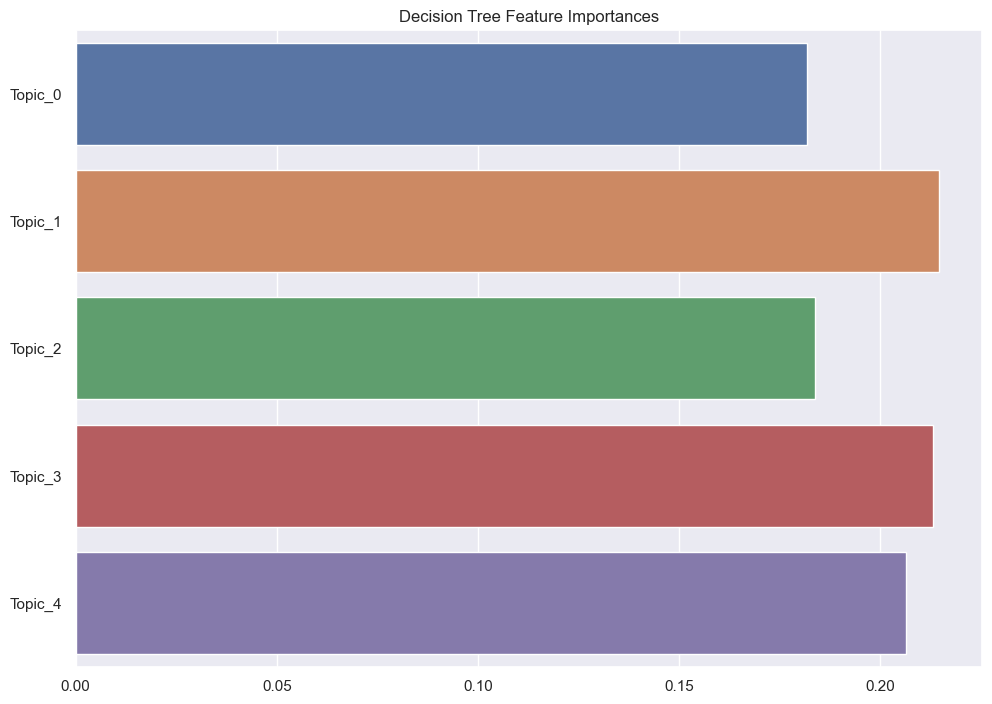

/var/folders/pr/9bm58yl12_jgb_1gj55t5cjw0000gn/T/ipykernel_13754/3885113292.py:36: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Verileri eğitim ve test setlerine bölün
X_train, X_test, y_train, y_test = train_test_split(topic_weights_sparse, df['label'], test_size=0.2, random_state=2001)

# Karar ağacı modelini oluşturun ve eğitin
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

# Özellik önem sıralamalarını alın
feature_importances = clf.feature_importances_

# Özellikleri isimleriyle eşleştirin
feature_names = ['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4']

# Özellik sıralamalarını görselleştirin
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x=feature_importances, y=feature_names, orient='h')
plt.title("Decision Tree Feature Importances")
plt.show()

# Modelin performansını ölçün
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Performans metriklerini DataFrame'e ekleyin
scores_model1 = pd.DataFrame(columns=['Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
scores_model1 = pd.concat([scores_model1, pd.DataFrame({'Name': ['Decision Tree'], 'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1 Score': [f1]})], ignore_index=True)



## [Model 1] Random Forest Topic Importance

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



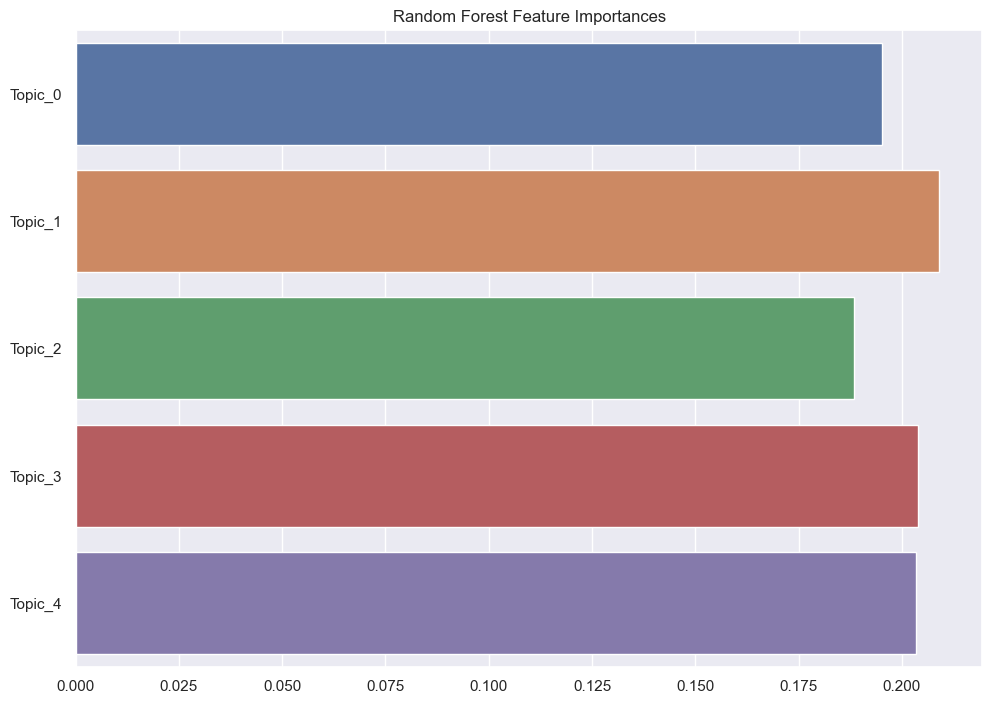

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Verileri eğitim ve test setlerine bölün
X_train, X_test, y_train, y_test = train_test_split(topic_weights_sparse, df['label'], test_size=0.2, random_state=2001)

# Random Forest modelini oluşturun ve eğitin
clf_rf = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=50)
clf_rf.fit(X_train, y_train)

# Özellik önem sıralamalarını alın
feature_importances_rf = clf_rf.feature_importances_

# Özellikleri isimleriyle eşleştirin
feature_names_rf = ['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4']

# Özellik sıralamalarını görselleştirin
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x=feature_importances_rf, y=feature_names_rf, orient='h')
plt.title("Random Forest Feature Importances")
plt.show()

# Modelin performansını ölçün
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Performans metriklerini DataFrame'e ekleyin
scores_model1 = pd.concat([scores_model1, pd.DataFrame({'Name': ['Random Forest'], 'Accuracy': [accuracy_rf], 'Precision': [precision_rf], 'Recall': [recall_rf], 'F1 Score': [f1_rf]})], ignore_index=True)



## [Model 1] XGBoost Topic Importance

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



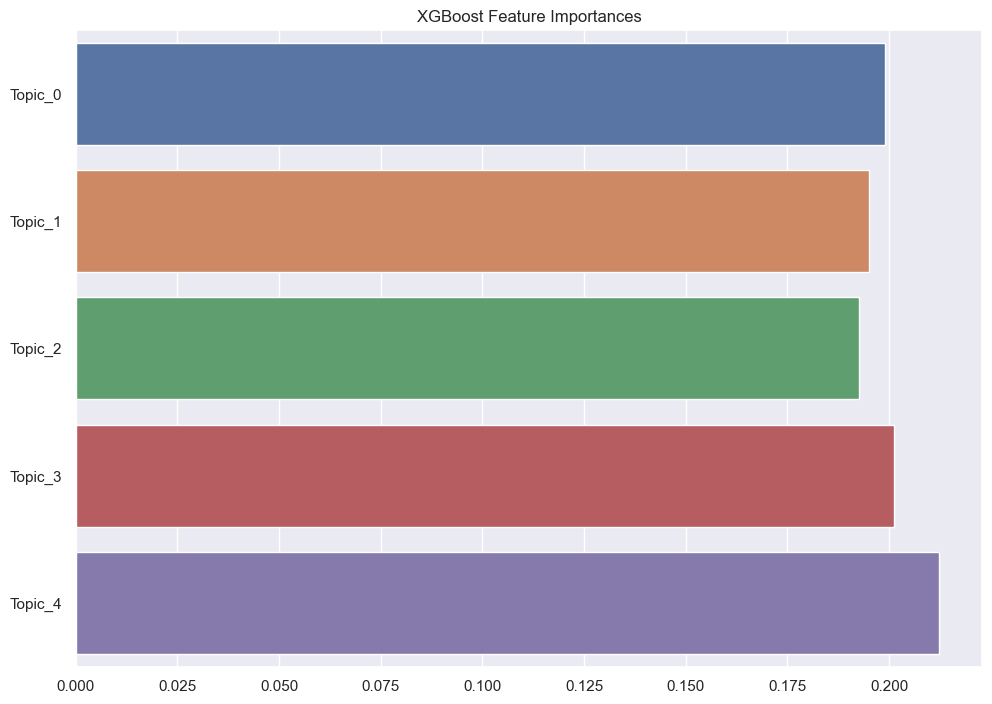

In [45]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Verileri eğitim ve test setlerine bölün
X_train, X_test, y_train, y_test = train_test_split(topic_weights_sparse, df['label'], test_size=0.2, random_state=2001)

# XGBoost modelini oluşturun ve eğitin
clf_xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=50)
clf_xgb.fit(X_train, y_train)

# Özellik önem sıralamalarını alın
feature_importances_xgb = clf_xgb.feature_importances_

# Özellikleri isimleriyle eşleştirin
feature_names_xgb = ['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4']


# Özellik sıralamalarını görselleştirin
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x=feature_importances_xgb, y=feature_names_xgb, orient='h')
plt.title("XGBoost Feature Importances")
plt.show()

# Modelin performansını ölçün
y_pred_xgb = clf_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Performans metriklerini DataFrame'e ekleyin
scores_model1 = pd.concat([scores_model1, pd.DataFrame({'Name': ['XGBoost'], 'Accuracy': [accuracy_xgb], 'Precision': [precision_xgb], 'Recall': [recall_xgb], 'F1 Score': [f1_xgb]})], ignore_index=True)


In [46]:
scores_model1.head()

Name  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.639400   0.747322  0.776429  0.761598
1  Random Forest  0.736398   0.741795  0.988872  0.847696
2        XGBoost  0.740713   0.741820  0.997724  0.850949

# Model 2  
##  TF-IDF Vectorized <Topic Weights + NRC Emotion Lexicon Scores> & Sentiment Labels

* Model 2 is the model that uses emotion scores calculated by using NRC Emotion lexicon combined by topic weights and sentiment labels.


In [47]:
# NRCLex Emotion Lexicon "emotion_scores" calculation function

from nrclex import NRCLex

def get_emotion_scores(text):
    text_object = NRCLex(text)
    emotion_scores = text_object.affect_frequencies
    
    max_emotion = max(emotion_scores, key=emotion_scores.get)
    max_score = emotion_scores[max_emotion]
    
    #emotion_scores['max_emotion'] = max_emotion
    #emotion_scores['max_score'] = max_score
    
    return emotion_scores


In [48]:
# Getting sentiment scores for text in each row using 'content_cleaned' column
emotion_scores_df = df['content_lemmatized'].apply(get_emotion_scores).tolist()

# Creating a df of sentiment scores
emotions_df = pd.DataFrame(emotion_scores_df)

# Copying 'anticipation' column data to  'anticip' column
emotions_df['anticip'] = emotions_df['anticipation']

# Dropping the 'anticipation' column
emotions_df = emotions_df.drop(columns=['anticipation'])

# Rename 
emotions_df.rename(columns={'anticip': 'anticipation'}, inplace=True)

# Combining emotion scores df with original df
nrc_emotions = pd.concat([df.reset_index(drop=True), emotions_df.reset_index(drop=True)], axis=1)

In [49]:
nrc_emotions.sample(5)

Index  Unnamed: 0                 userName  \
415      415         454              Punit Bamel   
19023  19023       21014            A Google user   
15578  15578       17319            A Google user   
8743    8743        9863          Mithlesh Mahato   
7735    7735        8751  Marithza Camacho Corona   

                                                 content  score  \
415                                   Give your email id      1   
19023  Each morning you are inundated with people sen...      5   
15578  There is no use in asking for nationality and ...      2   
8743   This is best app for learning new language and...      5   
7735                                          Worst ever      1   

       thumbsUpCount reviewCreatedVersion                   at  \
415                0               5.4.11  2023-09-03 21:12:35   
19023              1                2.4.5  2017-12-25 06:07:07   
15578              0                2.8.0  2018-12-12 16:37:36   
8743               0                4.1.5  2020-10-28 12:55:01   
7735               1                  NaN  2021-01-21 12:47:35   

                                         content_cleaned  \
415                                        give email id   
19023  morning inundated people sending twocharacter ...   
15578  use asking nationality native language separat...   
8743   best learning new language making new foreign ...   
7735                                          worst ever   

                                      content_lemmatized  label sentiment  \
415                                           give email      0  negative   
19023  morning inundate people send twocharacter hell...      1  positive   
15578  use ask nationality native language separately...      0  negative   
8743     well learn new language make new foreign friend      1  positive   
7735                                          worst ever      0  negative   

       fear  anger  anticipation  trust  surprise  sadness  disgust  joy  
415     0.0    0.0           NaN    0.0       0.0      0.0      0.0  0.0  
19023   0.0    0.0           NaN    0.0       0.0      0.0      0.0  0.0  
15578   0.5    0.0           0.5    0.0       0.0      0.0      0.0  0.0  
8743    0.0    0.0           NaN    0.5       0.0      0.0      0.0  0.5  
7735    0.0    0.0           NaN    0.0       0.0      0.0      0.0  0.0

In [50]:
nrc_emotions.head(5)

Index  Unnamed: 0        userName  \
0      0           0        Otis Tye   
1      1           1      Dami Vicky   
2      2           2  Micky Bélanger   
3      3           3    Sophia Ahmad   
4      4           4  Yousef El d7i7   

                                             content  score  thumbsUpCount  \
0         I feel like this program is an old friend.      4              0   
1  very interesting and good app , find a Good fr...      5              0   
2  It used to be very nice and useful, but now th...      1              0   
3                  My personal opinion has changed 😍      5              0   
4  Amazing app that will give many chances to to ...      5              0   

  reviewCreatedVersion                   at  \
0                  NaN  2023-11-06 08:17:27   
1               5.4.41  2023-11-06 06:23:46   
2               5.4.41  2023-11-06 05:32:07   
3               5.4.41  2023-11-06 00:36:19   
4               5.4.41  2023-11-05 22:33:52   

                                     content_cleaned  \
0                       feel like program old friend   
1                  interesting good find good friend   
2  used nice useful hid ability find people livin...   
3                           personal opinion changed   
4  amazing give many chances practice language u ...   

                                  content_lemmatized  label sentiment  fear  \
0                       feel like program old friend      1  positive   0.0   
1                  interesting good find good friend      1  positive   0.0   
2  use nice useful hide ability find people live ...      0  negative   1.0   
3                            personal opinion change      1  positive   0.5   
4  amazing give many chance practice language wan...      1  positive   0.0   

   anger  anticipation  trust  surprise  sadness  disgust  joy  
0    0.0           NaN    0.5       0.0      0.0      0.0  0.5  
1    0.0           0.2    0.3       0.2      0.0      0.0  0.3  
2    0.0           NaN    0.0       0.0      0.0      0.0  0.0  
3    0.0           NaN    0.5       0.0      0.0      0.0  0.0  
4    0.1           0.2    0.3       0.2      0.0      0.0  0.2

In [51]:
emotion_columns = ['joy','trust', 'anticipation', 'surprise', 'anger', 'disgust', 'fear', 'sadness']

# Converting NaN values in all emotion columns to 0

nrc_emotions[emotion_columns] = nrc_emotions[emotion_columns].fillna(0)


In [52]:
# Showing the emotion stats

emotions_stats = pd.DataFrame(columns=['emotion', 'stats'])
emotions_stats['emotion'] = ['joy', 'anticipation', 'anger', 'sadness', 'trust', 'surprise', 'disgust', 'fear']
emotions_stats['stats'] = 0

for index, row in emotions_stats.iterrows():
    emotion = row['emotion']
    my_filter = nrc_emotions[emotion] != 0
    different_than_zero = my_filter.sum()
    
    emotions_stats.at[index, 'stats'] = different_than_zero
    

In [53]:
emotions_stats

emotion  stats
0           joy  13294
1  anticipation  11250
2         anger   3577
3       sadness   4740
4         trust  14011
5      surprise   7558
6       disgust   3078
7          fear   4882

In [54]:
emotions_stats = emotions_stats.sort_values(by='stats', ascending=False)

fig = px.bar(emotions_stats, x='emotion', y='stats', color='emotion',
             title='Distribution of Emotions',
             labels={'stats': 'Stats', 'emotion': 'Emotion'})
fig.show()


## Model 2 Performance Results

In [103]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
nrc_emotions['label'] = le.fit_transform(nrc_emotions['sentiment'])

In [104]:
# Getting emotion scores

X_emotion = nrc_emotions[emotion_columns].values

In [105]:
# Changing the emotion scores array to sparse matrix

X_emotion_sparse = csr_matrix(X_emotion)

In [106]:
print(X_combined.shape)

(26649, 13)


In [107]:
print(topic_weights_sparse)

  (0, 0)	0.59993094
  (0, 1)	0.1000145
  (0, 2)	0.10002685
  (0, 3)	0.10001431
  (0, 4)	0.10001345
  (1, 0)	0.04147185
  (1, 1)	0.04142677
  (1, 2)	0.041051723
  (1, 3)	0.5225009
  (1, 4)	0.35354877
  (2, 0)	0.26485837
  (2, 1)	0.071996205
  (2, 2)	0.06846519
  (2, 3)	0.070816256
  (2, 4)	0.523864
  (3, 0)	0.18330881
  (3, 1)	0.51070255
  (3, 2)	0.05484606
  (3, 3)	0.05656142
  (3, 4)	0.1945811
  (4, 0)	0.04868798
  (4, 1)	0.05211308
  (4, 2)	0.048933648
  (4, 3)	0.79972345
  (4, 4)	0.050541893
  :	:
  (26644, 0)	0.056907147
  (26644, 1)	0.31852356
  (26644, 2)	0.10602898
  (26644, 3)	0.056574494
  (26644, 4)	0.46196586
  (26645, 0)	0.07437535
  (26645, 1)	0.07439272
  (26645, 2)	0.0744019
  (26645, 3)	0.07449436
  (26645, 4)	0.70233566
  (26646, 0)	0.052572116
  (26646, 1)	0.5094189
  (26646, 2)	0.17535338
  (26646, 3)	0.09817821
  (26646, 4)	0.1644774
  (26647, 0)	0.0678164
  (26647, 1)	0.7276233
  (26647, 2)	0.06784007
  (26647, 3)	0.0685318
  (26647, 4)	0.068188466
  (26648, 0)	0.0

In [108]:
print(X_emotion_sparse)

  (0, 0)	0.5
  (0, 1)	0.5
  (1, 0)	0.3
  (1, 1)	0.3
  (1, 2)	0.2
  (1, 3)	0.2
  (2, 6)	1.0
  (3, 1)	0.5
  (3, 6)	0.5
  (4, 0)	0.2
  (4, 1)	0.3
  (4, 2)	0.2
  (4, 3)	0.2
  (4, 4)	0.1
  (5, 1)	0.2857142857142857
  (5, 2)	0.14285714285714285
  (5, 4)	0.14285714285714285
  (5, 5)	0.14285714285714285
  (5, 6)	0.14285714285714285
  (5, 7)	0.14285714285714285
  (6, 0)	0.25
  (6, 1)	0.25
  (6, 2)	0.25
  (6, 3)	0.25
  (8, 0)	0.25
  :	:
  (26637, 5)	0.5
  (26637, 6)	0.5
  (26638, 1)	0.2727272727272727
  (26638, 2)	0.18181818181818182
  (26638, 6)	0.36363636363636365
  (26638, 7)	0.18181818181818182
  (26639, 0)	0.3333333333333333
  (26639, 1)	0.3333333333333333
  (26639, 2)	0.3333333333333333
  (26640, 2)	0.5
  (26640, 7)	0.5
  (26641, 7)	1.0
  (26643, 0)	0.5
  (26643, 2)	0.5
  (26644, 0)	0.25
  (26644, 1)	0.25
  (26644, 2)	0.25
  (26644, 3)	0.25
  (26645, 0)	0.25
  (26645, 1)	0.25
  (26645, 2)	0.25
  (26645, 3)	0.25
  (26647, 0)	0.3333333333333333
  (26647, 1)	0.3333333333333333
  (26647, 2)	0.

In [109]:
print(X_combined)

  (0, 0)	0.59993094
  (0, 1)	0.1000145
  (0, 2)	0.10002685
  (0, 3)	0.10001431
  (0, 4)	0.10001345
  (0, 5)	0.5
  (0, 6)	0.5
  (1, 0)	0.04147185
  (1, 1)	0.04142677
  (1, 2)	0.041051723
  (1, 3)	0.5225009
  (1, 4)	0.35354877
  (1, 5)	0.3
  (1, 6)	0.3
  (1, 7)	0.2
  (1, 8)	0.2
  (2, 0)	0.26485837
  (2, 1)	0.071996205
  (2, 2)	0.06846519
  (2, 3)	0.070816256
  (2, 4)	0.523864
  (2, 11)	1.0
  (3, 0)	0.18330881
  (3, 1)	0.51070255
  (3, 2)	0.05484606
  :	:
  (26645, 2)	0.0744019
  (26645, 3)	0.07449436
  (26645, 4)	0.70233566
  (26645, 5)	0.25
  (26645, 6)	0.25
  (26645, 7)	0.25
  (26645, 8)	0.25
  (26646, 0)	0.052572116
  (26646, 1)	0.5094189
  (26646, 2)	0.17535338
  (26646, 3)	0.09817821
  (26646, 4)	0.1644774
  (26647, 0)	0.0678164
  (26647, 1)	0.7276233
  (26647, 2)	0.06784007
  (26647, 3)	0.0685318
  (26647, 4)	0.068188466
  (26647, 5)	0.3333333333333333
  (26647, 6)	0.3333333333333333
  (26647, 7)	0.3333333333333333
  (26648, 0)	0.06781946
  (26648, 1)	0.37016115
  (26648, 2)	0.0678

In [110]:
from scipy.sparse import hstack

X_combined = hstack((topic_weights_sparse, X_emotion_sparse))

In [111]:
X_combined.columns = feature_names_with_emotions

In [112]:
# Splitting the features into train and test

# X = X_emotion_sparse  *'Emotion scores sparse matrix'*
#y = result_balanced_df2['label']  *'Sentiment Label'*

X_train, X_test, y_train, y_test = train_test_split(X_combined, nrc_emotions['label'], test_size=0.2, random_state=1)

In [90]:
'''''names = [
    "RandomForestClassifier",
    "RBF SVM",
    "Decision Tree",
    "Neural Net"
]


classifiers = [
    RandomForestClassifier(n_estimators=500, max_depth=20, random_state=51),
    SVC(gamma=2, C=1, random_state=51),
    DecisionTreeClassifier(max_depth=5, random_state=51),
    MLPClassifier(alpha=1, max_iter=1000, random_state=51)
]


# Iterating over classifiers

# Creating an scores dataframe with column names
scores_model2 = pd.DataFrame(columns=['Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
for name, clf in zip(names, classifiers):
    rs = compute_performance(name, clf, X_test, y_test)
    scores_model2.loc[len(scores_model2)] = rs

scores_model2.head()'''''

'\'\'names = [\n    "RandomForestClassifier",\n    "RBF SVM",\n    "Decision Tree",\n    "Neural Net"\n]\n\n\nclassifiers = [\n    RandomForestClassifier(n_estimators=500, max_depth=20, random_state=51),\n    SVC(gamma=2, C=1, random_state=51),\n    DecisionTreeClassifier(max_depth=5, random_state=51),\n    MLPClassifier(alpha=1, max_iter=1000, random_state=51)\n]\n\n\n# Iterating over classifiers\n\n# Creating an scores dataframe with column names\nscores_model2 = pd.DataFrame(columns=[\'Name\', \'Accuracy\', \'Precision\', \'Recall\', \'F1 Score\'])\nfor name, clf in zip(names, classifiers):\n    rs = compute_performance(name, clf, X_test, y_test)\n    scores_model2.loc[len(scores_model2)] = rs\n\nscores_model2.head()'

## [Model 2] Decision Tree Topic & Emotion Importance 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



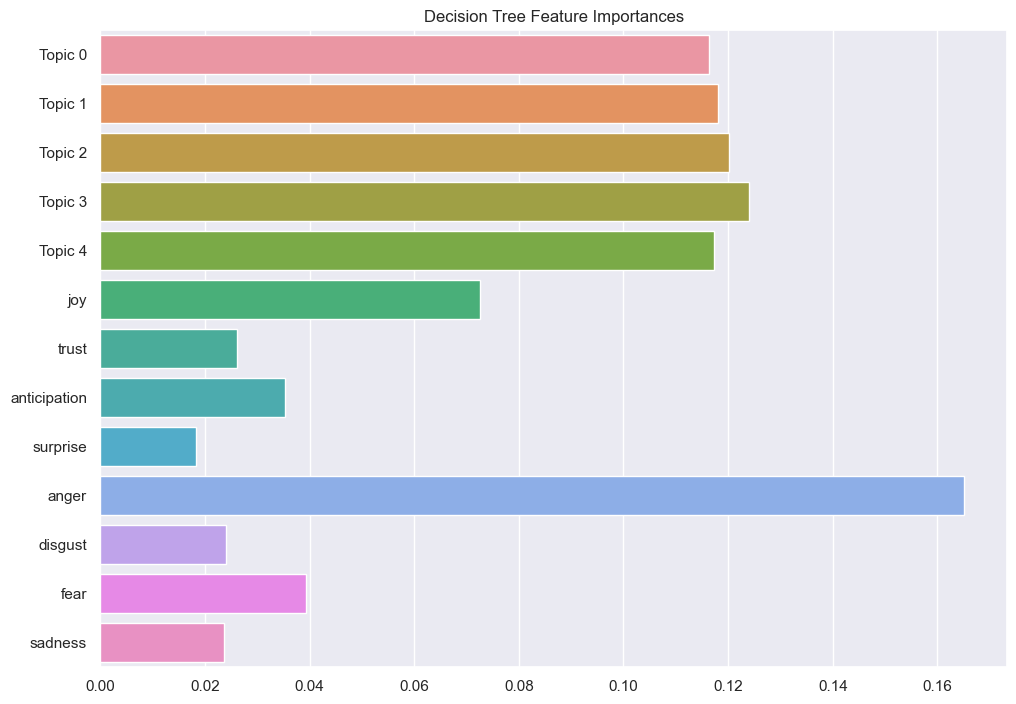

In [113]:
# Karar ağacı modelini oluşturun ve eğitin
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

# Özellik önem sıralamalarını alın
feature_importances = clf.feature_importances_

# Özellik sıralamalarını görselleştirin
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x=feature_importances, y=feature_names_with_emotions, orient='h')
plt.title("Decision Tree Feature Importances")
plt.show()



# Modelin performansını ölçün
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


## [Model 2] Random Forest Topic & Emotion Importance 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



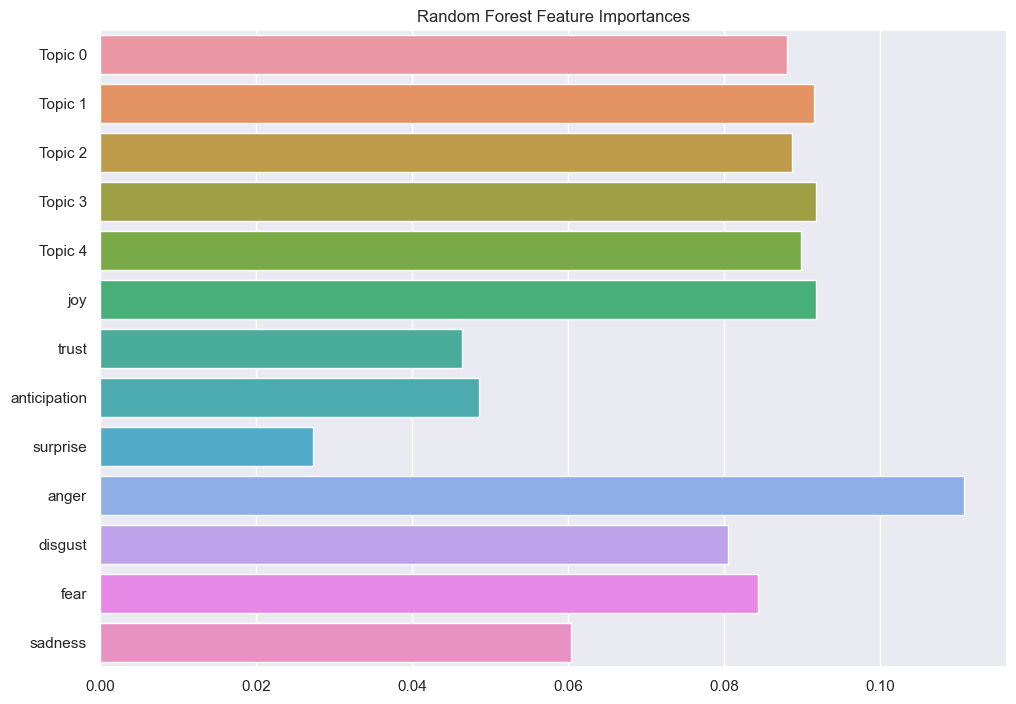

In [114]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini oluşturun ve eğitin
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=50)
rf_clf.fit(X_train, y_train)

# Özellik önem sıralamalarını alın
rf_feature_importances = rf_clf.feature_importances_


# Özellik sıralamalarını görselleştirin
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x=rf_feature_importances, y=feature_names_with_emotions, orient='h')
plt.title("Random Forest Feature Importances")
plt.show()

# Random Forest modelinin performansını ölçün
rf_y_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)



## [Model 2] XGBoost Topic & Emotion Importance 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



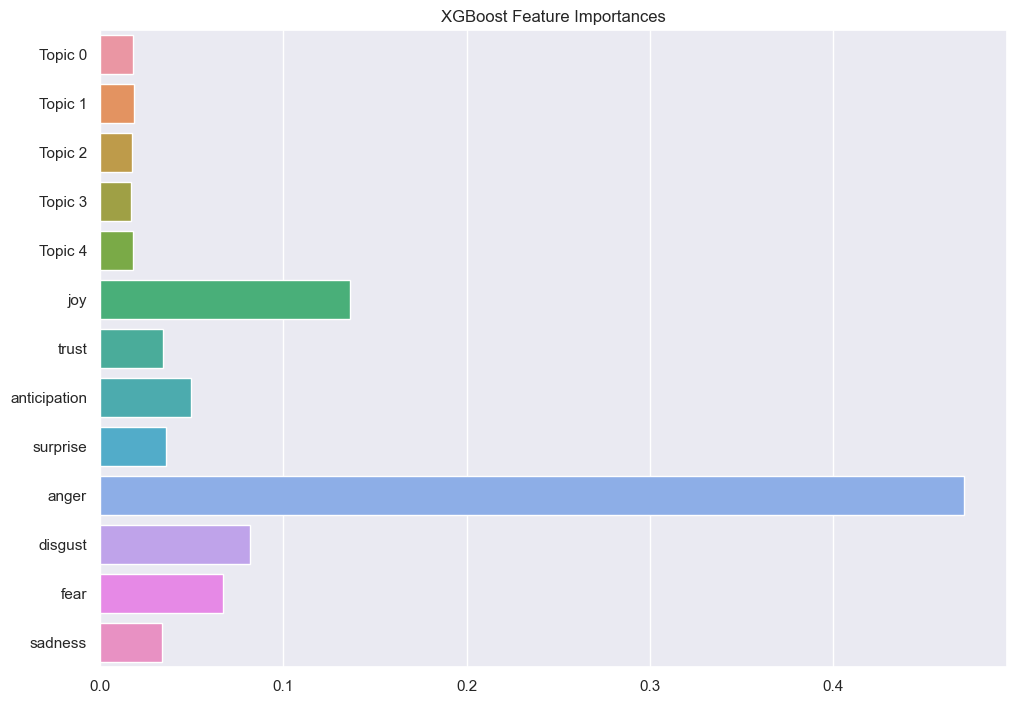

In [115]:
from xgboost import XGBClassifier

# XGBoost modelini oluşturun ve eğitin
xgb_clf = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=51)
xgb_clf.fit(X_train, y_train)

# Özellik önem sıralamalarını alın
xgb_feature_importances = xgb_clf.feature_importances_

# Özellik sıralamalarını görselleştirin
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x=xgb_feature_importances, y=feature_names_with_emotions, orient='h')
plt.title("XGBoost Feature Importances")
plt.show()

# XGBoost modelinin performansını ölçün
xgb_y_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)


In [ ]:
print(xgb_feature_importances)

In [117]:
scores_model2 = pd.DataFrame(columns=['Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
scores_model2 = pd.concat([scores_model2, pd.DataFrame({'Name': ['Decision Tree'], 'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1 Score': [f1]})], ignore_index=True)
scores_model2 = pd.concat([scores_model2, pd.DataFrame({'Name': ['Random Forest'], 'Accuracy': [rf_accuracy], 'Precision': [rf_precision], 'Recall': [rf_recall], 'F1 Score': [rf_f1]})], ignore_index=True)
scores_model2 = pd.concat([scores_model2, pd.DataFrame({'Name': ['XGBoost'], 'Accuracy': [xgb_accuracy], 'Precision': [xgb_precision], 'Recall': [xgb_recall], 'F1 Score': [xgb_f1]})], ignore_index=True)

/var/folders/pr/9bm58yl12_jgb_1gj55t5cjw0000gn/T/ipykernel_13754/3476258225.py:2: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



## Model 2 Results

In [118]:
scores_model2.head()

Name  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.726454   0.809215  0.824410  0.816742
1  Random Forest  0.800938   0.826235  0.925400  0.873010
2        XGBoost  0.804315   0.824742  0.933773  0.875878

# Model 3

## TF-IDF Vectorized <Topic Weights + GoEmotions Scores> & Sentiment Labels

* Model 3 is the model that contains topic weights + goemotions scores TF-IDF vectorization and sentiment labels.

In [119]:
'''from transformers import pipeline
import pandas as pd

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

sentences = ["I am not having a great day"]

model_outputs = classifier(sentences)
print(model_outputs[0])
# produces a list of dicts for each of the labels'''

'from transformers import pipeline\nimport pandas as pd\n\nclassifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)\n\nsentences = ["I am not having a great day"]\n\nmodel_outputs = classifier(sentences)\nprint(model_outputs[0])\n# produces a list of dicts for each of the labels'

In [120]:
from transformers import AutoTokenizer, pipeline
from optimum.onnxruntime import ORTModelForSequenceClassification

model_id = "SamLowe/roberta-base-go_emotions-onnx"
file_name = "onnx/model_quantized.onnx"

model = ORTModelForSequenceClassification.from_pretrained(model_id, file_name=file_name)
tokenizer = AutoTokenizer.from_pretrained(model_id)

onnx_classifier = pipeline(
    task="text-classification",
    model=model,
    tokenizer=tokenizer,
    top_k=None,
    function_to_apply="sigmoid",  # optional as is the default for the task
)

2024-01-17 16:21:53.989130: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
The ONNX file onnx/model_quantized.onnx is not a regular name used in optimum.onnxruntime, the ORTModel might not behave as expected.
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [121]:
import pandas as pd

# Duyguları sınıflandırmak için bir fonksiyon
def classify_emotions(text):
    model_outputs = onnx_classifier(text)
    
    emotion_scores = {result['label']: result['score'] for result in model_outputs[0]}
    
    return emotion_scores

# DataFrame'deki her bir satır için duygu skorlarını al
df['emotion_scores'] = df['content_lemmatized'].apply(classify_emotions)

# Duygu skorlarını sütunlara ayır
df_emotion_scores = pd.json_normalize(df['emotion_scores'])

# Orijinal DataFrame ile birleştir
df_concat_emotions = pd.concat([df, df_emotion_scores], axis=1)


In [122]:
print(df_emotion_scores.columns)

Index(['neutral', 'realization', 'approval', 'sadness', 'disappointment',
       'annoyance', 'caring', 'joy', 'embarrassment', 'nervousness', 'love',
       'disgust', 'fear', 'anger', 'grief', 'relief', 'admiration',
       'amusement', 'surprise', 'disapproval', 'remorse', 'confusion',
       'excitement', 'curiosity', 'desire', 'optimism', 'pride', 'gratitude'],
      dtype='object')


In [123]:
df_emotion_scores.to_csv('go_emotions_scores.csv')

In [124]:
'''# Showing the emotion stats

go_emotions_stats = pd.DataFrame(columns=['emotion', 'stats'])
go_emotions_stats['emotion'] = df_emotion_scores.columns
go_emotions_stats['stats'] = 0

for index, row in emotions_stats.iterrows():
    emotion = row['emotion']
    my_filter = df_emotion_scores[emotion] != 0
    different_than_zero = my_filter.sum()
    
    go_emotions_stats.at[index, 'stats'] = different_than_zero

'''

"# Showing the emotion stats\n\ngo_emotions_stats = pd.DataFrame(columns=['emotion', 'stats'])\ngo_emotions_stats['emotion'] = df_emotion_scores.columns\ngo_emotions_stats['stats'] = 0\n\nfor index, row in emotions_stats.iterrows():\n    emotion = row['emotion']\n    my_filter = df_emotion_scores[emotion] != 0\n    different_than_zero = my_filter.sum()\n    \n    go_emotions_stats.at[index, 'stats'] = different_than_zero\n\n"

In [125]:
df_concat_emotions.head()

Index  Unnamed: 0        userName  \
0      0           0        Otis Tye   
1      1           1      Dami Vicky   
2      2           2  Micky Bélanger   
3      3           3    Sophia Ahmad   
4      4           4  Yousef El d7i7   

                                             content  score  thumbsUpCount  \
0         I feel like this program is an old friend.      4              0   
1  very interesting and good app , find a Good fr...      5              0   
2  It used to be very nice and useful, but now th...      1              0   
3                  My personal opinion has changed 😍      5              0   
4  Amazing app that will give many chances to to ...      5              0   

  reviewCreatedVersion                   at  \
0                  NaN  2023-11-06 08:17:27   
1               5.4.41  2023-11-06 06:23:46   
2               5.4.41  2023-11-06 05:32:07   
3               5.4.41  2023-11-06 00:36:19   
4               5.4.41  2023-11-05 22:33:52   

                                     content_cleaned  \
0                       feel like program old friend   
1                  interesting good find good friend   
2  used nice useful hid ability find people livin...   
3                           personal opinion changed   
4  amazing give many chances practice language u ...   

                                  content_lemmatized  ...  surprise  \
0                       feel like program old friend  ...  0.002195   
1                  interesting good find good friend  ...  0.001455   
2  use nice useful hide ability find people live ...  ...  0.001829   
3                            personal opinion change  ...  0.000818   
4  amazing give many chance practice language wan...  ...  0.017911   

  disapproval   remorse  confusion  excitement  curiosity    desire  optimism  \
0    0.002078  0.002052   0.001873    0.001807   0.001484  0.001343  0.001325   
1    0.003026  0.000275   0.001529    0.005052   0.002289  0.000954  0.005564   
2    0.058054  0.005596   0.002265    0.000717   0.001167  0.000977  0.002638   
3    0.003029  0.000429   0.005442    0.001101   0.002004  0.001174  0.003384   
4    0.001905  0.000184   0.001898    0.072987   0.007434  0.001366  0.005236   

      pride  gratitude  
0  0.000888   0.000411  
1  0.002466   0.008516  
2  0.000893   0.001329  
3  0.000235   0.000889  
4  0.005632   0.003873  

[5 rows x 41 columns]

## Finding Dominant Emotions

In [126]:
'''import numpy as np

# Her satır için en yüksek skora sahip duygu adını bulan işlev
def find_dominant_emotion(row):
    positive_emotions = ['admiration', 'amusement', 'approval', 'caring', 'desire', 'excitement', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief']
    negative_emotions = ['sadness', 'fear', 'embarrassment', 'disapproval', 'disappointment', 'annoyance', 'anger', 'nervousness', 'remorse', 'grief', 'disgust']
    ambiguous_emotions = ['realization', 'surprise', 'curiosity', 'confusion', 'neutral']

    # Her bir duygu için skorları al
    positive_scores = [row[emotion] for emotion in positive_emotions]
    negative_scores = [row[emotion] for emotion in negative_emotions]
    ambiguous_scores = [row[emotion] for emotion in ambiguous_emotions]

    # En yüksek skora sahip duygunun adını bul
    dominant_positive_emotion = positive_emotions[np.argmax(positive_scores)]
    dominant_negative_emotion = negative_emotions[np.argmax(negative_scores)]
    dominant_ambiguous_emotion = ambiguous_emotions[np.argmax(ambiguous_scores)]

    return dominant_positive_emotion, dominant_negative_emotion, dominant_ambiguous_emotion

# DataFrame'e yeni bir sütun ekleyerek her satır için en baskın duyguları bul
df_concat_emotions[['dominant_positive_emotion', 'dominant_negative_emotion', 'dominant_ambiguous_emotion']] = df_concat_emotions.apply(find_dominant_emotion, axis=1, result_type='expand')
'''

"import numpy as np\n\n# Her satır için en yüksek skora sahip duygu adını bulan işlev\ndef find_dominant_emotion(row):\n    positive_emotions = ['admiration', 'amusement', 'approval', 'caring', 'desire', 'excitement', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief']\n    negative_emotions = ['sadness', 'fear', 'embarrassment', 'disapproval', 'disappointment', 'annoyance', 'anger', 'nervousness', 'remorse', 'grief', 'disgust']\n    ambiguous_emotions = ['realization', 'surprise', 'curiosity', 'confusion', 'neutral']\n\n    # Her bir duygu için skorları al\n    positive_scores = [row[emotion] for emotion in positive_emotions]\n    negative_scores = [row[emotion] for emotion in negative_emotions]\n    ambiguous_scores = [row[emotion] for emotion in ambiguous_emotions]\n\n    # En yüksek skora sahip duygunun adını bul\n    dominant_positive_emotion = positive_emotions[np.argmax(positive_scores)]\n    dominant_negative_emotion = negative_emotions[np.argmax(negative_scores)]\n    d

In [127]:
desired_order = ['userName', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 
                 'content_cleaned', 'label', 'sentiment', 'admiration', 'amusement', 'approval', 'caring', 'desire', 'excitement', 
                 'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief', 'sadness', 'fear', 'embarrassment', 'disapproval', 'disappointment', 'annoyance', 
                 'anger', 'nervousness', 'remorse', 'grief', 'disgust', 'realization', 'surprise', 'curiosity', 'confusion', 'neutral',
            ]

df_concat_emotions = df_concat_emotions[desired_order]

In [128]:
selected_columns = ['admiration', 'amusement', 'approval', 'caring', 'desire', 'excitement','gratitude', 'joy', 'love', 'optimism', 'pride', 'relief', 'sadness', 'fear', 'embarrassment', 'disapproval', 'disappointment', 'annoyance', 'anger', 'nervousness', 'remorse', 'grief', 'disgust', 'realization', 'surprise', 'curiosity', 'confusion', 'neutral']

In [129]:
go_emotions = df_concat_emotions[selected_columns]
go_emotions_matrix = csr_matrix(go_emotions.values)

In [130]:
go_emotions.head()

admiration  amusement  approval    caring    desire  excitement  gratitude  \
0    0.002693   0.002306  0.054872  0.006046  0.001343    0.001807   0.000411   
1    0.930990   0.001490  0.059569  0.002605  0.000954    0.005052   0.008516   
2    0.021467   0.001130  0.020197  0.001205  0.000977    0.000717   0.001329   
3    0.002196   0.001534  0.020786  0.000957  0.001174    0.001101   0.000889   
4    0.895077   0.006845  0.036603  0.001252  0.001366    0.072987   0.003873   

        joy      love  optimism  ...     anger  nervousness   remorse  \
0  0.005325  0.004774  0.001325  ...  0.003219     0.004857  0.002052   
1  0.007377  0.003793  0.005564  ...  0.000809     0.000148  0.000275   
2  0.001097  0.003554  0.002638  ...  0.011343     0.001213  0.005596   
3  0.001046  0.001299  0.003384  ...  0.001609     0.000314  0.000429   
4  0.016549  0.002226  0.005236  ...  0.001127     0.000253  0.000184   

      grief   disgust  realization  surprise  curiosity  confusion   neutral  
0  0.003067  0.004169     0.079484  0.002195   0.001484   0.001873  0.625506  
1  0.000296  0.000441     0.004990  0.001455   0.002289   0.001529  0.022027  
2  0.002803  0.016238     0.017728  0.001829   0.001167   0.002265  0.271820  
3  0.000361  0.001576     0.012971  0.000818   0.002004   0.005442  0.957427  
4  0.000371  0.000715     0.004583  0.017911   0.007434   0.001898  0.031146  

[5 rows x 28 columns]

In [131]:
len(selected_columns)

28

In [132]:
topic_weights_sparse.shape

(26649, 5)

In [133]:
go_emotions_matrix.shape

(26649, 28)

In [134]:
X_combined_2 = hstack((topic_weights_sparse, go_emotions_matrix))

In [135]:
feature_names_with_emotions = feature_names + selected_columns

In [136]:
X_combined_2.columns = feature_names_with_emotions

In [137]:
X_combined_2.shape

(26649, 33)

In [138]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_concat_emotions = df_concat_emotions.copy()
df_concat_emotions['label'] = le.fit_transform(df_concat_emotions['sentiment'])


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_combined_2, df_concat_emotions['label'], test_size=0.2, random_state=2006)

## [Model 3] Decision Tree Topic & Emotion Importance

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



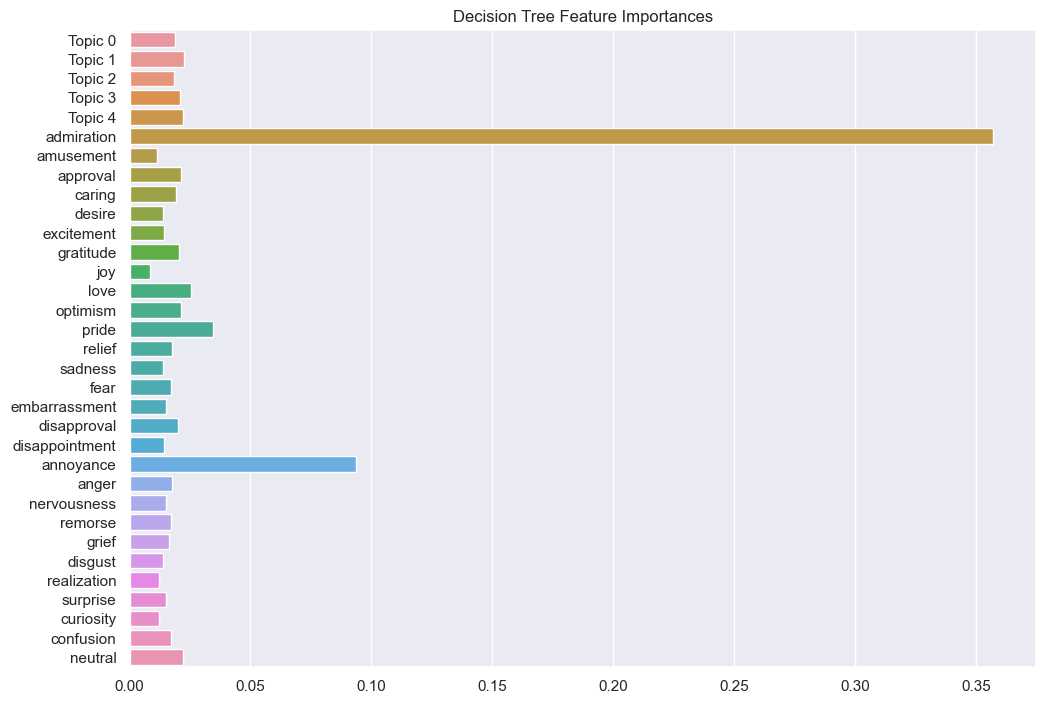

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Karar ağacı modelini oluşturun ve eğitin
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

# Özellik önem sıralamalarını alın
feature_importances = clf.feature_importances_

# Özellikleri isimleriyle eşleştirin


# Özellik sıralamalarını görselleştirin
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x=feature_importances, y=feature_names_with_emotions, orient='h')
plt.title("Decision Tree Feature Importances")
plt.show()


# Modelin performansını ölçün
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



## [Model 3] Random Forest Topic & Emotion Importance

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



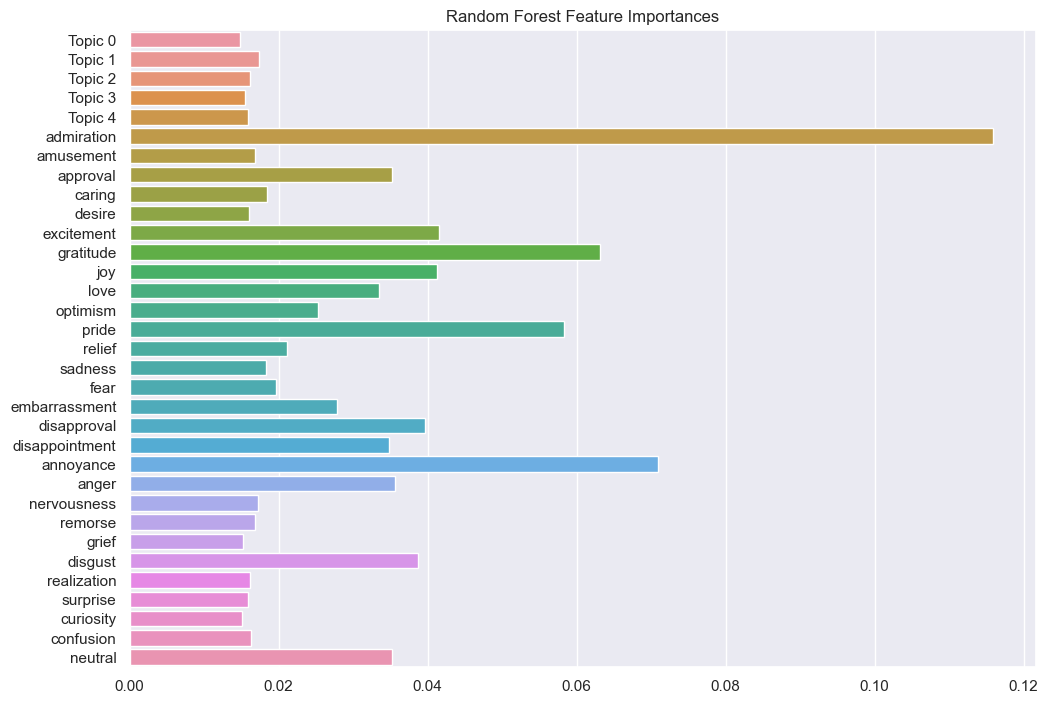

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Random Forest modelini oluşturun ve eğitin
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=50)
rf_clf.fit(X_train, y_train)

# Özellik önem sıralamalarını alın
rf_feature_importances = rf_clf.feature_importances_

# Özellik sıralamalarını görselleştirin
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x=rf_feature_importances, y=feature_names + selected_columns, orient='h')
plt.title("Random Forest Feature Importances")
plt.show()

# Random Forest modelinin performansını ölxaçün
rf_y_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)


## [Model 3] XGBoost Topic & Emotion Importance

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



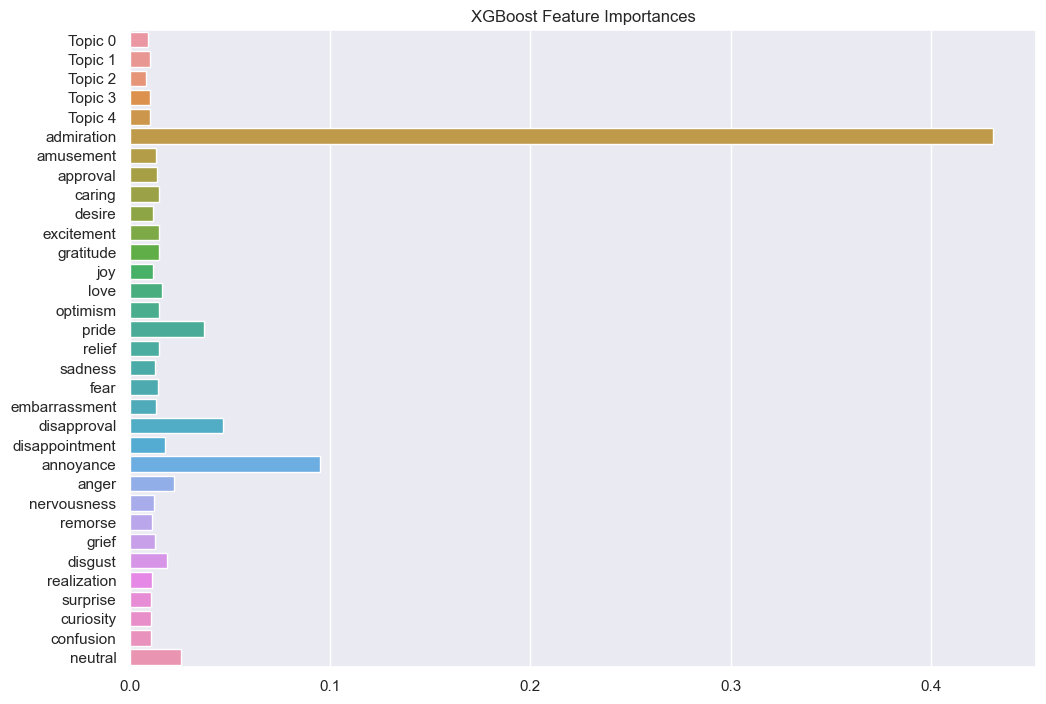

In [142]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# XGBoost modelini oluşturun ve eğitin
xgb_clf = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=50)
xgb_clf.fit(X_train, y_train)

# Özellik önem sıralamalarını alın
xgb_feature_importances = xgb_clf.feature_importances_

# Özellik sıralamalarını görselleştirin
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x=xgb_feature_importances, y=feature_names + selected_columns, orient='h')
plt.title("XGBoost Feature Importances")
plt.show()

# XGBoost modelinin performansını ölçün
xgb_y_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)


In [143]:

# Performans metriklerini DataFrame'e ekleyin
scores_model3 = pd.DataFrame(columns=['Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
scores_model3 = pd.concat([scores_model3, pd.DataFrame({'Name': ['Decision Tree'], 'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1 Score': [f1]})], ignore_index=True)
scores_model3 = pd.concat([scores_model3, pd.DataFrame({'Name': ['Random Forest'], 'Accuracy': [rf_accuracy], 'Precision': [rf_precision], 'Recall': [rf_recall], 'F1 Score': [rf_f1]})], ignore_index=True)
scores_model3 = pd.concat([scores_model3, pd.DataFrame({'Name': ['XGBoost'], 'Accuracy': [xgb_accuracy], 'Precision': [xgb_precision], 'Recall': [xgb_recall], 'F1 Score': [xgb_f1]})], ignore_index=True)

/var/folders/pr/9bm58yl12_jgb_1gj55t5cjw0000gn/T/ipykernel_13754/3611380003.py:3: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



## Model 3 Results

In [144]:
scores_model3.head()

Name  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.802251   0.862986  0.871295  0.867121
1  Random Forest  0.858349   0.886815  0.927033  0.906478
2        XGBoost  0.857036   0.887187  0.924500  0.905459

## Model 4  [Topic Weights & NRC & GoEmotions]

In [156]:
X_combined_4 = hstack((X_combined, go_emotions_matrix))

In [157]:
X_combined_4.columns = ['Topic_0', 'Topic_1','Topic_2', 'Topic_3','Topic_4', 
                        'N_joy','N_trust', 'N_anticipation', 'N_surprise', 'N_anger', 'N_disgust', 'N_fear', 'N_sadness',
                        'G_admiration', 'G_amusement', 'G_approval', 'G_caring', 'G_desire', 'G_excitement','G_gratitude', 'G_joy', 'G_love', 'G_optimism', 'G_pride', 'G_relief', 'G_sadness', 'G_fear',
                        'G_embarrassment', 'G_disapproval', 'G_disappointment', 'G_annoyance', 'G_anger', 'G_nervousness', 'G_remorse', 'G_grief', 'G_disgust', 'G_realization', 'G_surprise', 'G_curiosity', 'G_confusion', 'G_neutral']

In [158]:
X_combined_4.shape

(26649, 41)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_combined_4, df_concat_emotions['label'], test_size=0.2, random_state=2006)

## [Model 4] Decision Tree

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



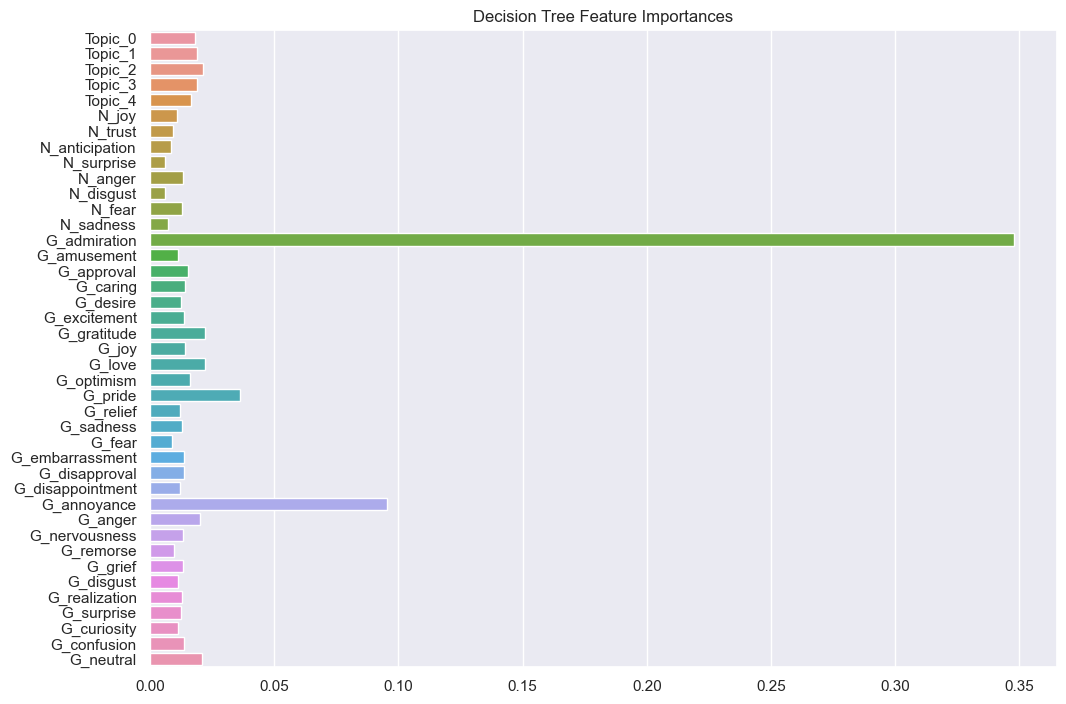

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Karar ağacı modelini oluşturun ve eğitin
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

# Özellik önem sıralamalarını alın
feature_importances = clf.feature_importances_

# Özellikleri isimleriyle eşleştirin


# Özellik sıralamalarını görselleştirin
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x=feature_importances, y=X_combined_4.columns, orient='h')
plt.title("Decision Tree Feature Importances")
plt.show()


# Modelin performansını ölçün
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



## [Model 4] Random Forest

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



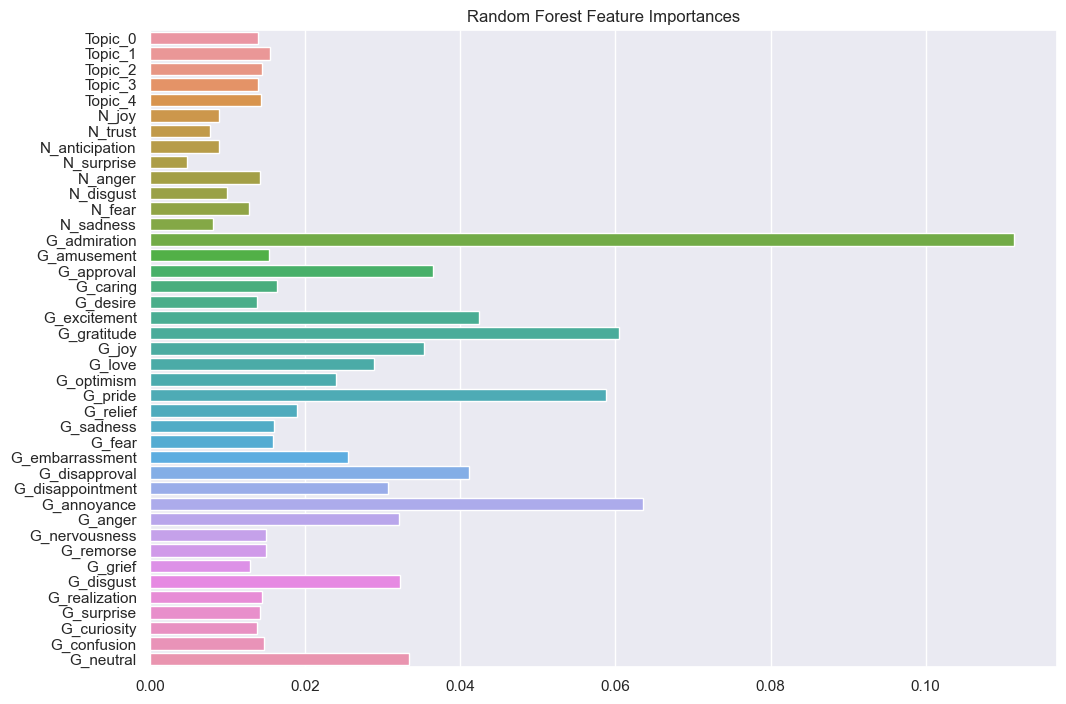

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=50)
rf_clf.fit(X_train, y_train)

rf_feature_importances = rf_clf.feature_importances_

sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x=rf_feature_importances, y=X_combined_4.columns, orient='h')
plt.title("Random Forest Feature Importances")
plt.show()

rf_y_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)


## [Model 4] XGBoost

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



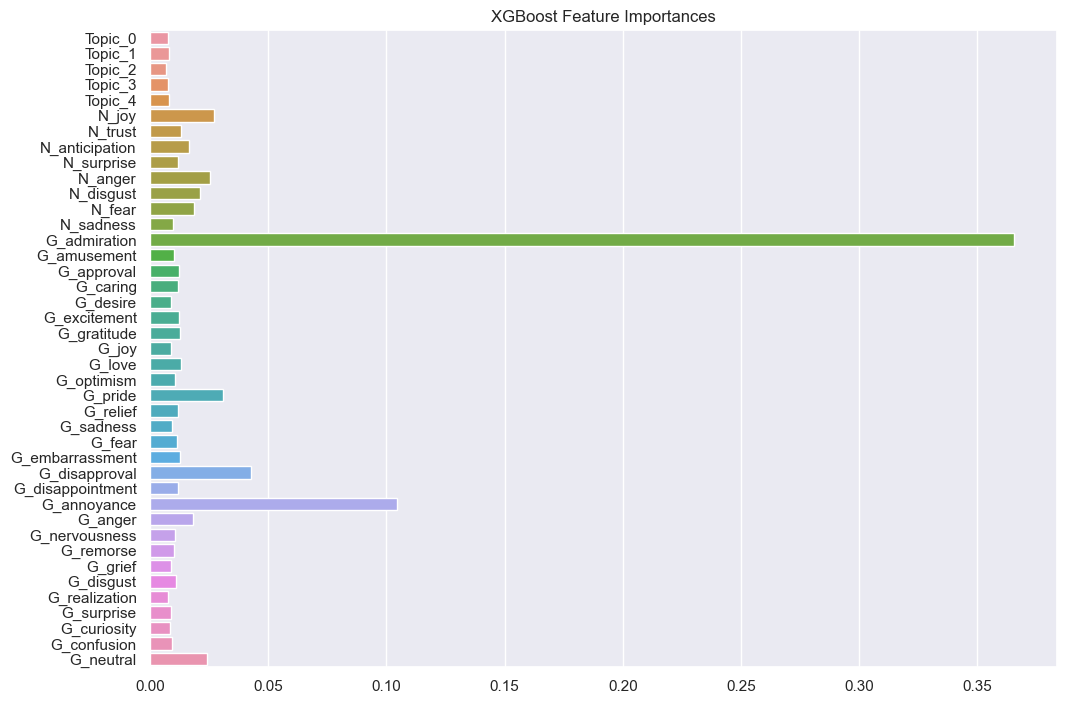

In [163]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

xgb_clf = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=50)
xgb_clf.fit(X_train, y_train)

xgb_feature_importances = xgb_clf.feature_importances_

sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x=xgb_feature_importances, y=X_combined_4.columns, orient='h')
plt.title("XGBoost Feature Importances")
plt.show()

xgb_y_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)


In [166]:
scores_model4 = pd.DataFrame(columns=['Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
scores_model4 = pd.concat([scores_model4, pd.DataFrame({'Name': ['Decision Tree'], 'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1 Score': [f1]})], ignore_index=True)
scores_model4 = pd.concat([scores_model4, pd.DataFrame({'Name': ['Random Forest'], 'Accuracy': [rf_accuracy], 'Precision': [rf_precision], 'Recall': [rf_recall], 'F1 Score': [rf_f1]})], ignore_index=True)
scores_model4 = pd.concat([scores_model4, pd.DataFrame({'Name': ['XGBoost'], 'Accuracy': [xgb_accuracy], 'Precision': [xgb_precision], 'Recall': [xgb_recall], 'F1 Score': [xgb_f1]})], ignore_index=True)

/var/folders/pr/9bm58yl12_jgb_1gj55t5cjw0000gn/T/ipykernel_13754/2038212009.py:3: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [167]:
scores_model4

Name  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.803189   0.860627  0.876108  0.868299
1  Random Forest  0.866604   0.895599  0.928047  0.911534
2        XGBoost  0.864165   0.892379  0.928553  0.910107

## Scores Table [ALL MODELS]

In [169]:
import plotly.graph_objects as go

# Merging all model scores together
merged_scores = pd.concat([scores_model1, scores_model2, scores_model3, scores_model4])


fig = go.Figure()

# Metrics selected
metrics = ['Accuracy', 'F1 Score']

colors = {'Accuracy': 'darkviolet', 'F1 Score': 'lightseagreen'}

for metric in metrics:
    x_values = [f'{model_name} - Model 1' for model_name in merged_scores['Name'].unique()] + \
               [f'{model_name} - Model 2' for model_name in merged_scores['Name'].unique()] + \
               [f'{model_name} - Model 3' for model_name in merged_scores['Name'].unique()] + \
               [f'{model_name} - Model 4' for model_name in merged_scores['Name'].unique()]
    
    y_values = merged_scores[metric].tolist() * 3
    
    fig.add_trace(go.Bar(x=x_values,
                         y=y_values,
                         name=metric,
                         marker_color=colors[metric]))

fig.update_layout(title='Comparison of Model Performances',
                  xaxis_title='Classifier Name & Model',
                  yaxis_title='Score Value',
                  barmode='group')
fig.show()


In [170]:
merged_scores

Name  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.639400   0.747322  0.776429  0.761598
1  Random Forest  0.736398   0.741795  0.988872  0.847696
2        XGBoost  0.740713   0.741820  0.997724  0.850949
0  Decision Tree  0.726454   0.809215  0.824410  0.816742
1  Random Forest  0.800938   0.826235  0.925400  0.873010
2        XGBoost  0.804315   0.824742  0.933773  0.875878
0  Decision Tree  0.802251   0.862986  0.871295  0.867121
1  Random Forest  0.858349   0.886815  0.927033  0.906478
2        XGBoost  0.857036   0.887187  0.924500  0.905459
0  Decision Tree  0.803189   0.860627  0.876108  0.868299
1  Random Forest  0.866604   0.895599  0.928047  0.911534
2        XGBoost  0.864165   0.892379  0.928553  0.910107